<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Phase2/Session2/Copy_of_EVA_P2S2_File_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import SimpleRNN


from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')

Using TensorFlow backend.


Loading data...


In [0]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

25000 train sequences
25000 test sequences
Pad sequences (samples x time)


In [0]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)

input_train shape: (25000, 500)


In [0]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, dropout=0.5, return_sequences=True))
model.add(SimpleRNN(32, dropout=0.5))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________


In [0]:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 36s 2ms/step - loss: 1.3146 - acc: 0.5137 - val_loss: 0.7265 - val_acc: 0.4942
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.8786 - acc: 0.6011 - val_loss: 0.5683 - val_acc: 0.7160
Epoch 3/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.6664 - acc: 0.7423 - val_loss: 0.4842 - val_acc: 0.7908
Epoch 4/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.5545 - acc: 0.7937 - val_loss: 0.9481 - val_acc: 0.6646
Epoch 5/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.5409 - acc: 0.8342 - val_loss: 0.4796 - val_acc: 0.7982
Epoch 6/10
 2176/20000 [==>...........................] - ETA: 29s - loss: 0.4054 - acc: 0.8695

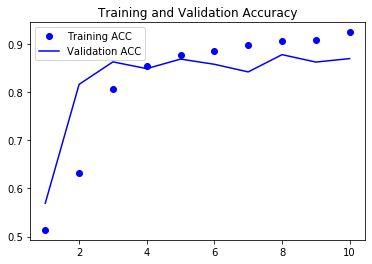

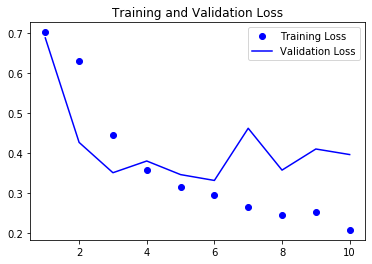

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training ACC')
plt.plot(epochs, val_acc, 'b', label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()